In [ ]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Tensor
- 텐서는 배열이나 행렬과 매우 유사한 특수 자료구조
- 모델의 입출력, 매개변수들을 부호화(encode)
- gpu나 다른 hw 가속기에서 실행가능 (ndarray 비슷)

In [ ]:
import torch
import numpy as np

## Tensor 초기화

In [ ]:
# 데이터로부터 직접 초기화 (자료형 유추)
data=[[1,2],[3,4]]
x_data=torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# numpy 배열로부터 생성
np_arr=np.array(data)
x_np=torch.from_numpy(np_arr)
print(x_np)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [ ]:
# 다른 tensor로부터 생성(재정의 하지 않으면, shape,datatype 유지)
x_one=torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_one}\n")

x_rand=torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand}\n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]])

Random Tensor: 
 tensor([[0.7888, 0.1047],
        [0.5091, 0.4093]])



In [ ]:
# shape 으로 차원 결정 후 랜덤으로 생성
shape=(2,3,)
rand=torch.rand(shape)
one=torch.ones(shape)
zero=torch.zeros(shape)

print(f"Random Tensor:{rand}\n")
print(f"one Tensor:{one}\n")
print(f"zero Tensor:{zero}\n")

Random Tensor:tensor([[0.2787, 0.7371, 0.0812],
        [0.4391, 0.6635, 0.1353]])

one Tensor:tensor([[1., 1., 1.],
        [1., 1., 1.]])

zero Tensor:tensor([[0., 0., 0.],
        [0., 0., 0.]])



In [ ]:
# tensor 속성 : dtype, shape, device(저장위치)
print(rand.shape)
print(rand.dtype)
print(rand.device)

torch.Size([2, 3])
torch.float32
cpu


## Tensor 연산
- 전치, 인덱싱, 슬라이싱, 수치 계산, 선형 대수, 샘플링 ..


In [ ]:
# GPU 가용성 확윈 뒤 텐서 명시 이동
if torch.cuda.is_available():
  tensor=tensor.to("cuda")

In [ ]:
# 표준 인덱싱, 슬라이싱
tensor=torch.ones(4,4)
print(f"first row:{tensor[0]}")
print(f"first column:{tensor[:,0]}")
print(f"last row:{tensor[...,-1]}")
tensor[:,1]=-1
print(tensor)

first row:tensor([1., 1., 1., 1.])
first column:tensor([1., 1., 1., 1.])
last row:tensor([1., 1., 1., 1.])
tensor([[ 1., -1.,  1.,  1.],
        [ 1., -1.,  1.,  1.],
        [ 1., -1.,  1.,  1.],
        [ 1., -1.,  1.,  1.]])


In [ ]:
# 합치기 (torch,cat / torch.stack )
t=torch.cat([tensor,tensor],dim=1)
print(t)

tensor([[ 1., -1.,  1.,  1.,  1., -1.,  1.,  1.],
        [ 1., -1.,  1.,  1.,  1., -1.,  1.,  1.],
        [ 1., -1.,  1.,  1.,  1., -1.,  1.,  1.],
        [ 1., -1.,  1.,  1.,  1., -1.,  1.,  1.]])


In [ ]:
# 산술 연산
# 행렬 곱
y1=tensor @ tensor.T    # @
y2= tensor.matmul(tensor.T) # matmul
y3=torch.rand_like(y1) 
torch.matmul(tensor, tensor.T, out=y3) # matmul
print(f"{y1}\n {y2}\n {y3}\n")

# 요소별 곱
z1=tensor*tensor
z2=tensor.mul(tensor)
z3=torch.rand_like(tensor)
torch.mul(tensor,tensor,out=z3)
print(f"{z1}\n {z2}\n {z3}\n")

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])
 tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])
 tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])



In [ ]:
# 집계 (sum ) 후 요소가 하나일 경우 python int로 변환가능
agg=tensor.sum()
print(agg.item(), type(agg.item()))

8.0 <class 'float'>


In [ ]:
# tensor <-> numpy
t=torch.ones(5)
n=t.numpy()
print(f"t: {t}\n n: {n}\n")

n=np.ones(5)
t=torch.from_numpy(n)
n=t.numpy()
print(f"t: {t}\n n: {n}\n")

t: tensor([1., 1., 1., 1., 1.])
 n: [1. 1. 1. 1. 1.]

t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
 n: [1. 1. 1. 1. 1.]



# DataSet & DataLoader
- 모델 학습 코드로부터 데이터 셋을 분리해 가독성 모듈성 향상
- torch.utils.data.DataLodaer, torch.utils.data.Dataset -> 데이터 기본 요소
- DataSet: 샘플과 정답 저장, DataLoader: Dataset을 샘플에 쉽게 접근할 수 있도록하는 이터러블 객체

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



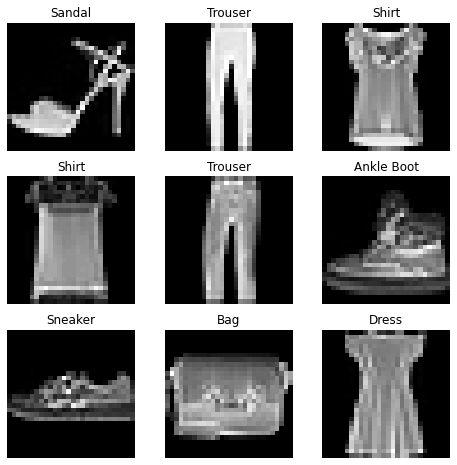

In [ ]:
# 데이터 시각화
labels_map={
    0:"T-Shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9: "Ankle Boot",
}

figure=plt.figure(figsize=(8,8))
cols,rows=3,3
for i in range(1, cols* rows +1):
  sample=torch.randint(len(train),size=(1,)).item()
  img, label=train[sample]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(),cmap="gray")

plt.show()

In [ ]:
# 사용자 정의 데이터셋 
import os
import pandas as pd
from torchvision.io import read_image

class CustomIamgeDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels=pd.read_csv(annotations_file, name=["file_name",'label'])
    self.img_dir=img_dir
    self.transform=transform
    self.target_transform=target_transform

    def __len__(self):
      return len(self.img_labels)

# 주어진 인덱스 idx에 해당하는 샘플을 불러오고 반환 , read_image로 이미지 -> 텐서 변환, self.img_lablels에서 정답 반환, 변형 함수 호출한 뒤 이미지:라벨 딕셔너리 반환
    def __getitem__(self,idx):
      img_path=os.path.join(self.img_dir,self.img_lables.iloc[idx,0])
      image=read_image(img_path)
      label=self.img_labels.ilod[idx,1]
      if self.transform:
        image=self.transform(image)
      if self.target_transform:
        label=self.target_transform(label)
        return image, label

In [ ]:
# 학습용 데이터 준비
from torch.utils.data import DataLoader
train_dataloader=DataLoader(train,batch_size=64,shuffle=True)
test_dataloader=DataLoader(test,batch_size=64,shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


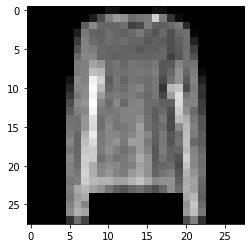

label: 2


In [ ]:
# DataLoader로 순회 (iterate)
train_features, train_labels=next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img=train_features[0].squeeze()
label=train_labels[0]
plt.imshow(img,cmap="gray")
plt.show()
print(f"label: {label}")

# Transform
- 모든 데이터셋은 변형 로직을 갖는 호출가능한 객체를 받는 매개변수 두개 존재
- transform: feature 변경
- target_transform : label 변경
 -> torchvision.transforms
- fashionMnist:
  - feature: python iamge liabrary(PIL)
  - label: integer
- 학습위해 정규화된 텐서 feature과 원핫인코딩된 label 필요


In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),   #Totensor: pil 이미지를 tensor or ndarr 로 변환하고 이미지 픽셀 크기를 정규화
    target_transform=Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y), value=1)) # 정답 개수 크기 10짜리 영텐서를 만들고 scatter 호출해 주어진 정답 y에해당하는 인덱스에 value=1할당하는 원핫인코딩
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# 신경망 모델 구성
1. faltten으로 계층 초기화해 연속된 배열로 변환
2. 선형,비선형 번갈아 변환하여 학습 (순서대로)
3. 분류한 예측확률 정규화하여 나타냄

In [3]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
device="cuda" if torch.cuda.is_available() else "cpu" 
print(f"Using {device} device")

Using cuda device


In [8]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten=nn.Flatten()
    self.linear_relu_stack=nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10),
    )
  def forward(self,x):
    x=self.flatten(x)
    logits=self.linear_relu_stack(x)
    return logits


In [9]:
model=NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [10]:
input_image=torch.rand(3,28,28)
print(input_image.size())                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

torch.Size([3, 28, 28])


## nn.Flatten
계층을 초기화해 28*28 2D이미지를 784 픽셀값을 갖는 연속된 배열로 변환

In [13]:
flatten=nn.Flatten()
flat_image=flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


## nn.Linear
저장된 가중치와 편향을 사용해 입력에 선형 변환을 적용

In [17]:
layer1=nn.Linear(in_features=28*28, out_features=20)
hidden1=layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


## nn.ReLU
선형 변환후 적용되어 비선형성을 도입해 다양한 학습을 할 수 있도록 도움

In [19]:
print(f'Before ReLU{hidden1}\n\n')
hidden1=nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLUtensor([[0.0720, 0.0000, 0.2411, 0.0000, 0.0000, 0.2781, 0.0000, 0.0241, 0.2031,
         0.0000, 0.0000, 0.0000, 0.0000, 0.1240, 0.0666, 0.2636, 0.4407, 0.0000,
         0.1602, 0.3929],
        [0.0736, 0.0000, 0.0952, 0.0000, 0.0000, 0.3562, 0.2120, 0.0886, 0.3570,
         0.0000, 0.0000, 0.0000, 0.0000, 0.3378, 0.0000, 0.2514, 0.3209, 0.0000,
         0.0275, 0.1793],
        [0.3692, 0.0000, 0.0000, 0.0000, 0.0790, 0.0000, 0.0983, 0.1773, 0.2818,
         0.0463, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1927, 0.2609, 0.0315,
         0.3971, 0.3630]], grad_fn=<ReluBackward0>)


After ReLU: tensor([[0.0720, 0.0000, 0.2411, 0.0000, 0.0000, 0.2781, 0.0000, 0.0241, 0.2031,
         0.0000, 0.0000, 0.0000, 0.0000, 0.1240, 0.0666, 0.2636, 0.4407, 0.0000,
         0.1602, 0.3929],
        [0.0736, 0.0000, 0.0952, 0.0000, 0.0000, 0.3562, 0.2120, 0.0886, 0.3570,
         0.0000, 0.0000, 0.0000, 0.0000, 0.3378, 0.0000, 0.2514, 0.3209, 0.0000,
         0.0275, 0.1793],
        [

## nn.Sequential
순서를 갖는 모듈의 컨테이너

In [20]:
seq_modules=nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10),
)
input_image=torch.rand(3,28,28)
logits=seq_modules(input_image)

## nn.Softmax
신경망의 마지막 선형 계층이 전달되어 무한 범위의 원시값인 logits반환
각 분류에 대한 예측 확률을 정규화하여 나타냄


In [21]:
softmax=nn.Softmax(dim=1)
pred_probab=softmax(logits)

# 모델 매개변수 (가중치, 바이어스)
학습 중 최적화 되는 가중치와 바이어스에 연관지어 매개변수화됨
nn.Module을 상속하여 모든 필드를 자동 추적하고 모델의 파라미터 메소드로 매개변수에 접근 가능

In [23]:
print(f"Model structure:{model}\n\n")

for name,param in model.named_parameters():
  print(f"Layer: {name} | Size : {param.size()} | Values: {param[:2]}\n")

Model structure:NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size : torch.Size([512, 784]) | Values: tensor([[-0.0293, -0.0030,  0.0052,  ..., -0.0032, -0.0168,  0.0349],
        [-0.0181,  0.0258,  0.0047,  ..., -0.0328, -0.0285, -0.0082]],
       device='cuda:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.0.bias | Size : torch.Size([512]) | Values: tensor([0.0054, 0.0100], device='cuda:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.2.weight | Size : torch.Size([512, 512]) | Values: tensor([[ 0.0441,  0.0006,  0.0337,  ...,  0.0361,  0.0428,  0.0441],
        [ 0.0204,  0.0314, -0.0229,  ...,  0.0392, -0.0192,  0.0385]],
       device='cuda:0', grad_fn=<SliceBa

# Torch.autograd 자동 미분
- 역전파에서 매개변수(가중치)는 손실함수의 변화도에 따라 조정
- pytorch의 자동미분 엔진(Torch.autograd)
- wx+b-> z ->ce(y)->loss
- 가중치, 바이어스 손실함수 변화도: 텐서에 requires_grad 속성 설정
- Function 클래스 객체 : 순전파 함수 계산, 역전파 도함수 계산(grad_fn속성에 저장)
- autograd
 -  데이터, 실행된 모든 연산들의 기록을 function 객체로 구성된 비순환 그래프에 저장 => Directed Acyclic Graph)
 - 그래프의 잎은 입력 텐서, 뿌리는 결과 텐서이므로 뿌리부터 잎까지 추적하여 연쇄법칙에 따라 변화도를 자동 계산

 - 순전파:요청된 연산을 수행해 결과 텐서 계산, DAG에 연산 변화도 기능 유지
 - 역전파: DAG 뿌리에서 .bakcward()호출시 각 .grad_fn으로 부터 변화도 계산, 각 탠서에 .grad속성에 계산 결과 쌓기, 연쇄법칙으로 모든 잎 텐서들까지 전파

- 선택적으로 읽기
  - 스칼라 손실 함수로 일부 매개변수와 관련된 변화고 계산
  - 출력함수가 임의의 텐서이 경우 야코비안 곱 계산(벡터전치 * 야코비안행렬)
  - 벡터를 인자로 backward호출하면 이루어짐, 원래 텐서 크기와 같아야 함
  - 동일 인자로 두번 역전파해면 변화도 값이 달라짐(pytorch의 변화도 누적)
  - 계산된 변화도의 값이 연산 그래프의 모든 잎 노드 .grad속성에 추가
  - 실제 계산을 위해 grad속성 0으로 초기화(옵티마이저)

In [24]:
# 단일 계층 신경망
import torch
x=torch.ones(5) #input layer
y=torch.zeros(3) #output layer
w=torch.randn(5,3,requires_grad=True)
b=torch.randn(3,requires_grad=True)
z=torch.matmul(x,w)+b
loss=torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [25]:
print(f"gradient function for z: {z.grad_fn}")    # 역전파
print(f"gradient function for loss: {loss.grad_fn}")

gradient function for z: <AddBackward0 object at 0x7f91caf6b4c0>
gradient function for loss: <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f91caf6b070>


## 변화도 계산
가중치 최적화를 위해 매개변수에 대한 손실함수의 도함수 계산 필요

In [26]:
loss.backward() # 연산 그래프의 잎 노드 중 requires_grad=True로 설정된 노드들의 grad 속성만 구함
print(w.grad) # backward()사용한 변화계산은 한번만 수행, retain_graph=True로 여러번 호출
print(b.grad)

tensor([[0.1334, 0.0270, 0.3266],
        [0.1334, 0.0270, 0.3266],
        [0.1334, 0.0270, 0.3266],
        [0.1334, 0.0270, 0.3266],
        [0.1334, 0.0270, 0.3266]])
tensor([0.1334, 0.0270, 0.3266])


## 변화도 추적 멈추기
- requries_grad=True인 텐서들은 연산 기록을 추적하고 변화도 계산을 지원
- 순전파 연산만 필요한 경우는 torch.no_grad()로 연산 추적 멈춤
- 신경망의 일부 매개변수를 고정된 매개변수로 표시-> 사전학습된 신경망을 미세조정
- 연산속도 향상


In [28]:
z=torch.matmul(x,w)+b
print(z.requires_grad)

with torch.no_grad():
  z=torch.matmul(x,w)+b
print(z.requires_grad)

True
False


In [29]:
# 결과가 임의의 텐서일 때
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")



First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


# 모델 매개변수 최적화
- epoch(반복) 단계에서 모델이 출력을 추측하고 추측과 정답 사이의 오류(손실)을 계산하고 매개변수에 대한 오류의 도함수를 수집하고 경사하강법으로 최적화(optimize)


In [30]:
#기본 코드
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

## 하이퍼파라미터
- 에포크: 반복횟수
- 배치 크기: 매개변수가 갱신되기 전 신경망을 통해 전파된 데이터 샘플 수
- 학습률: 배치/에포크에서 모델의 매개변수를 조절하는 비율, 값이 작을 수록 학습속도가 느려지나 값이 크면 학습 중  예측할 수 없는 동작 발생

# 최적화 단계
1. 에포크
  - 학습 단계: 학습용 데이터셋을 반복(iterate)하고 최적의 매개변수로 수렴
  - 검증/테스트 단계: 모델 성능이 개선되고 있는지 확인 위해 테스트 데이터셋 반복  

2. 옵티마이저
 - 학습 단계에서 모델의 오류를 줄이기 위해 모델 매개변수를 조정
 - 모든 최적화 절차는 optimizer객체에 캡슐화
 - 학습 단계에서의 최적화
      - optimizer.zero_grad()호출해 모델 매개변수의 변화도 재설정
      - 변화도는 더해지므로 중복계산으 막기위해 반복할때마다 0으로 설정
      - loss.backwards()를 호출하여 예측 손실을 역전파 (손실 변화도 저장)
      - 변화도 계산 뒤 optimizer.step()을 호출해 역전파 단계에서 수집된 변화도로 매개변수 조정

In [32]:
# 학습 단계
# 손실함수 - 획득한 결과와 실제값 사이의 틀린 정도 특정
loss_fn=nn.CrossEntropyLoss()

In [33]:
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

NameError: ignored

In [34]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [35]:
loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

NameError: ignored

# 모델 저장 및 불러오기
- pytorch 모델은 학습한 매개변수를 state_dict라 불리는 내부상태사전에 저장
- torch.save()로 저장
- 가중치 불러오기 위해 동일한 모델의 인스턴스를 생성 후 load_state_dict() 사용해 매개변수 불러옴
- 가중치 불러올 때 신경망의 구조를 정의하기 위해 모델 클래스 먼저 생성후 torch.save()에 모델 저장
- torch.load()로 모델 불러옴

In [ ]:
import torch
import torchvision.models as models
model = models.vgg16(pretrained=True)
# 모델 저장
torch.save(model.state_dict(), 'model_weights.pth')

model = models.vgg16() # 기본가중치 안불러옴

model.load_state_dict(torch.load('model_weights.pth'))
model.eval()
torch.save(model, 'model.pth')
#모델 불러오기
model = torch.load('model.pth')